In [86]:
from os import listdir
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
results = None
for f in listdir('results'):
    tmp = pd.read_csv('results/' + f)
    tmp['epoch'] = np.arange(1, len(tmp)+1)

    if results is None:
        results = tmp
    else:
        results = results.append(tmp)

In [70]:
results.groupby(['model'])\
    .agg({'test_mse': 'min'})\
    .reset_index()\
    .merge(results, on=['test_mse', 'model'], how='left').\
    sort_values(['test_mse'])

,model,test_mse,architecture,dropout,lr,node_features,edge_features,train_mse,epoch
1,GCN,0.808742,"(20,)",0.3,0.10,keywords,crew,0.963790,406
2,SAGE,0.891507,"(32, 16)",0.0,0.01,keywords,crew,0.962240,485
0,GAT,1.492904,"(20,)",0.0,0.10,keywords,crew,1.682293,500


In [105]:
r = results.groupby(['model', 'node_features', 'edge_features'])\
    .agg({'test_mse': 'min'})\
    .reset_index()\
    .merge(results, on=['test_mse', 'model', 'node_features', 'edge_features'], how='left')\
    .sort_values('test_mse').to_latex(index=False)

In [106]:
import pyperclip
pyperclip.copy(r)

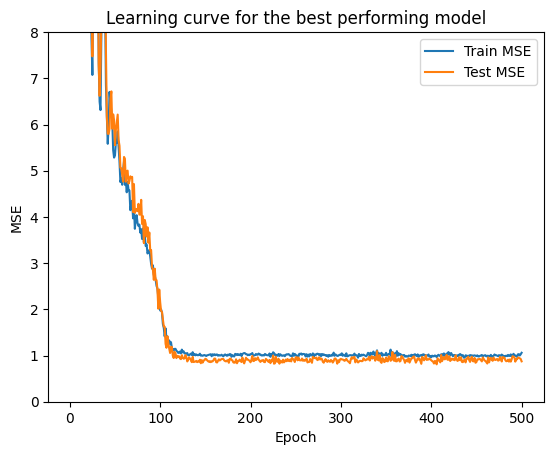

In [109]:
best_model = results.loc[results.test_mse == results.test_mse.min(), ['model', 'architecture', 'dropout', 'lr', 'node_features', 'edge_features']].merge(results, on=['model', 'architecture', 'dropout', 'lr','node_features', 'edge_features'], how='left')

best_model.rename(columns = {"train_mse": "Train MSE", 'test_mse': "Test MSE"}).plot(x='epoch', y=['Train MSE', 'Test MSE'])
plt.ylim(0, 8)
plt.ylabel('MSE')
plt.title('Learning curve for the best performing model')
plt.xlabel('Epoch')
plt.savefig('figures/learning_curve.pdf')

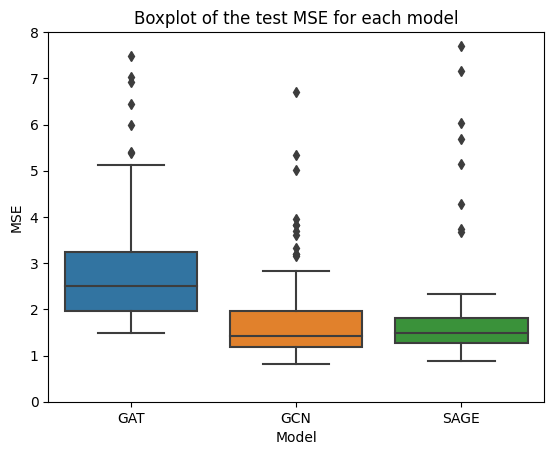

In [112]:
by_model = results.groupby(['model', 'architecture', 'dropout', 'lr', 'node_features', 'edge_features'])\
    .agg({'test_mse': 'min'})\
    .reset_index()

sns.boxplot(x='model', y='test_mse', data=by_model)
plt.ylim(0, 8)
plt.ylabel('MSE')
plt.xlabel('Model')
plt.title('Boxplot of the test MSE for each model')
plt.savefig('figures/boxplot_homo.pdf')